In [27]:
# nom  des binoms 
# ADAM Oumar Adam
# MASLAK Med Amine
# Tp 1 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# avec seaborn 
import seaborn as sns











## Question 1 : Importer le fichier capital.xls.

In [11]:
#Question 1 
# 1. Importer le fichier capital.xls

# 1. Importer le fichier capital.xls
data = pd.read_excel('capital.xls')



## Question 2 : Donner une représentation graphique en histogramme du pourcentage de villes par région

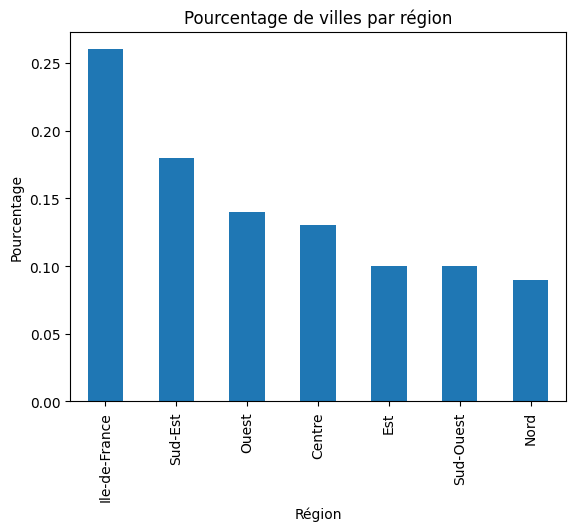

In [12]:
# Question 2 
# 2. Représentation graphique en histogramme du pourcentage de villes par région
data['Z'].value_counts(normalize=True).plot(kind='bar', title='Pourcentage de villes par région')
plt.xlabel('Région')
plt.ylabel('Pourcentage')
plt.show()

## Question 3 : Représenter graphiquement et de différentes manières la répartition de chaque région pour cet ensemble de données.

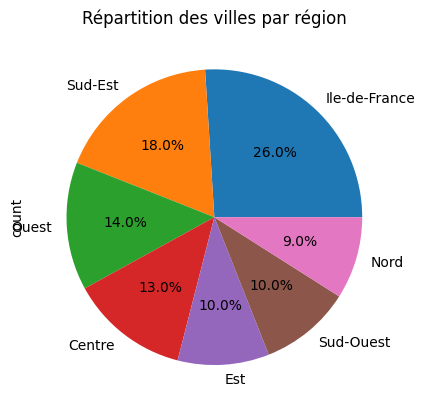

In [28]:
# Question 3
# 3. Répartition de chaque région pour cet ensemble de données
data['Z'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des villes par région')
plt.show()

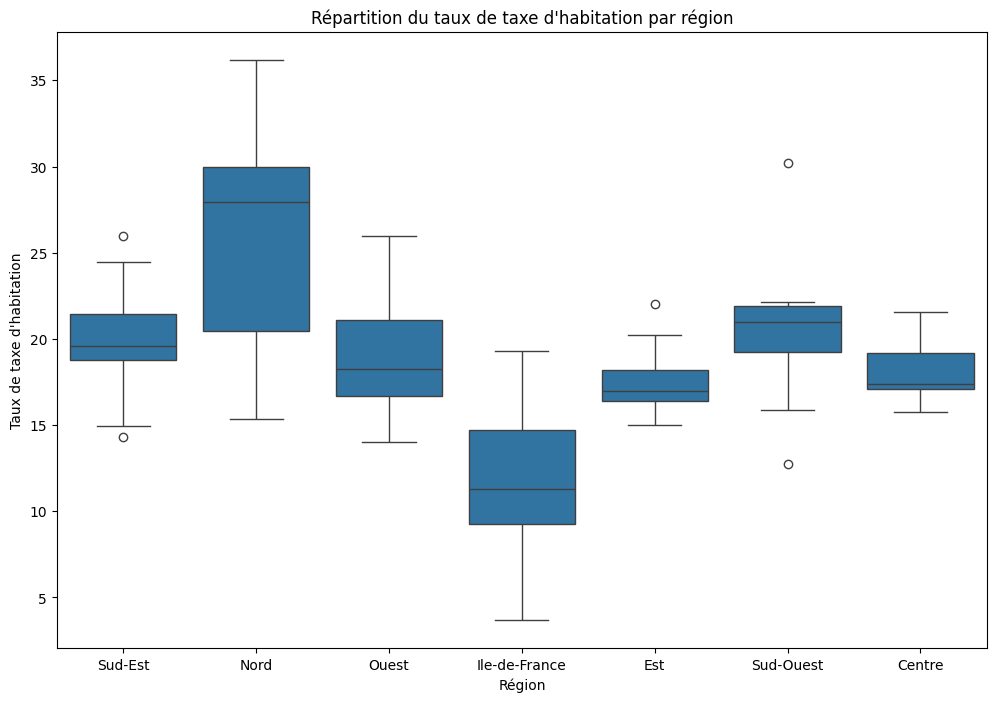

In [29]:
# Autre représentation graphique
plt.figure(figsize=(12, 8))
plt.title("Répartition du taux de taxe d'habitation par région")
sns.boxplot(data=data, x='Z', y='Y')
plt.xlabel("Région")
plt.ylabel("Taux de taxe d'habitation")
plt.show()

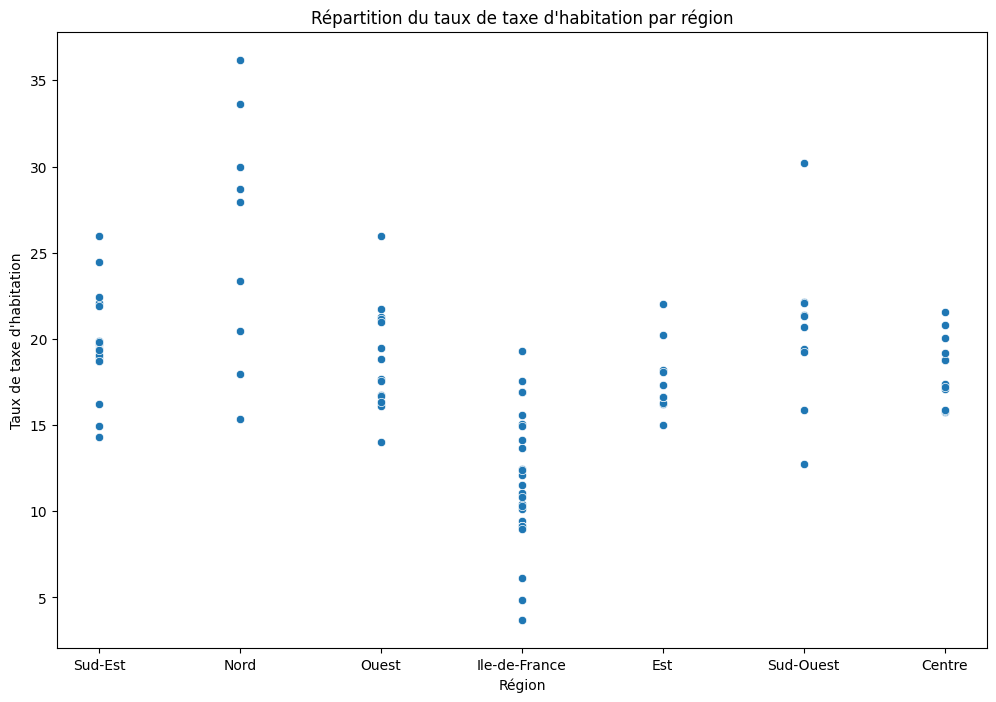

In [34]:
# Autre représentation graphique
# en nuage de points
plt.figure(figsize=(12, 8))
plt.title("Répartition du taux de taxe d'habitation par région")
sns.scatterplot(data=data, x='Z', y='Y')
plt.xlabel("Région")
plt.ylabel("Taux de taxe d'habitation")
plt.show()


## Question 4 : Quelle est la région la plus représentée dans cette étude ?

In [14]:
# Question 4 

# 4. Région la plus représentée dans cette étude
most_represented_region = data['Z'].value_counts().idxmax()
print(f"La région la plus représentée est : {most_represented_region}")

La région la plus représentée est : Ile-de-France


## Question 5 : Calculer les différentes statistiques sur le taux de la taxe d’habitation. Regrouper ensuite ces statistiques par région.

In [32]:
#  5. chaque région, la ville avec le taux de taxe d'habitation 



# Calcul des statistiques sur le taux de la taxe d'habitation
moyenne = data['Y'].mean()
median = data['Y'].median()
ecart_type = data['Y'].std()
minimum = data['Y'].min()
maximum = data['Y'].max()


# Affichage des statistiques
print("Moyenne :", moyenne)
print("Médiane :", median)
print("Écart-type :", ecart_type)
print("Minimum :", minimum)
print("Maximum :", maximum)




Moyenne : 17.770699999999998
Médiane : 17.625
Écart-type : 5.529599188170711
Minimum : 3.68
Maximum : 36.17


In [15]:
# gouper par region
grouped = data.groupby('Z')['Y'].describe()
print(grouped)


               count       mean       std    min      25%     50%      75%  \
Z                                                                            
Centre          13.0  18.115385  1.906881  15.77  17.0700  17.370  19.1900   
Est             10.0  17.662000  2.095200  14.98  16.3875  16.975  18.1850   
Ile-de-France   26.0  11.764615  3.879327   3.68   9.2425  11.285  14.7375   
Nord             9.0  25.951111  7.099798  15.37  20.4600  27.970  29.9600   
Ouest           14.0  18.896429  3.098314  14.00  16.6875  18.265  21.0900   
Sud-Est         18.0  19.769444  2.938534  14.30  18.7675  19.575  21.4225   
Sud-Ouest       10.0  20.511000  4.549406  12.72  19.2700  21.010  21.9325   

                 max  
Z                     
Centre         21.55  
Est            22.04  
Ile-de-France  19.32  
Nord           36.17  
Ouest          25.99  
Sud-Est        25.98  
Sud-Ouest      30.23  


## Question 6 : Quelle est la région la plus intéressante pour le taux de la taxe d’habitation ?

In [16]:
# 6. Région la plus intéressante pour le taux de la taxe d’habitation
interesting_region = grouped['mean'].idxmin()
print(f"La région la plus intéressante pour le taux de la taxe d'habitation est : {interesting_region}")



La région la plus intéressante pour le taux de la taxe d'habitation est : Ile-de-France


## Question 7 : Quelle est la région la plus représentative de la moyenne nationale ?

In [17]:
# 7. Région la plus représentative de la moyenne nationale
national_average = data['Y'].mean()
closest_to_national_average = (grouped['mean'] - national_average).abs().idxmin()
print(f"La région la plus représentative de la moyenne nationale est : {closest_to_national_average}")



La région la plus représentative de la moyenne nationale est : Est


## Question 8 : Donner en fonction du taux de la taxe d’habitation une typologie des villes françaises en 3 groupes

In [18]:
# 8. Typologie des villes françaises en 3 groupes
bins = pd.qcut(data['Y'], 3, labels=["Bas", "Moyen", "Haut"])
print(bins.value_counts())



Y
Bas      34
Moyen    33
Haut     33
Name: count, dtype: int64


## Question 9 : En utilisant une fonction Python, donner les villes qui ont un taux de taxe d’habitation situé 30% au dessus ou en dessous de la moyenne.

In [19]:
# 9. Villes qui ont un taux de taxe d’habitation situé 30% au dessus ou en dessous de la moyenne
threshold = 0.3
above = data[data['Y'] > national_average * (1 + threshold)]['X']
below = data[data['Y'] < national_average * (1 - threshold)]['X']
print(f"Villes avec un taux de taxe d'habitation 30% au-dessus de la moyenne : {above.tolist()}")
print(f"Villes avec un taux de taxe d'habitation 30% en dessous de la moyenne : {below.tolist()}")



Villes avec un taux de taxe d'habitation 30% au-dessus de la moyenne : ['Arles', 'Brest', 'Calais', 'Dunkerque', 'La Seyne-sur-Mer', 'Lille', 'Nimes', 'Roubaix', 'Tourcoing', "Villeneuve-d'Asq"]
Villes avec un taux de taxe d'habitation 30% en dessous de la moyenne : ['Antony', 'Asnières-sur-Seine', 'Boulogne-Billancourt', 'Courbevoie', 'Drancy', 'Fontenay-sous-Bois', 'Ivry-sur-Seine', 'Maisons-Alfort', 'Nanterre', 'Neuilly-sur-Seine', 'Paris', 'Saint-Denis', 'St-Maur-des-Fossés', 'Sartrouville', 'Versailles', 'Vitry-sur-Seine']


## Question 10 : Idem pour les villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de la moyenne.

In [20]:
# 10. Villes qui ont un taux de taxe d’habitation situé 20% au dessus ou en dessous de la moyenne
threshold = 0.2
above = data[data['Y'] > national_average * (1 + threshold)]['X']
below = data[data['Y'] < national_average * (1 - threshold)]['X']
print(f"Villes avec un taux de taxe d'habitation 20% au-dessus de la moyenne : {above.tolist()}")
print(f"Villes avec un taux de taxe d'habitation 20% en dessous de la moyenne : {below.tolist()}")


Villes avec un taux de taxe d'habitation 20% au-dessus de la moyenne : ['Ajaccio', 'Arles', 'Avignon', 'Béziers', 'Bordeaux', 'Brest', 'Calais', 'Dunkerque', 'La Seyne-sur-Mer', 'Lille', 'Marseille', 'Montpellier', 'Nimes', 'Poitiers', 'Rennes', 'Roubaix', 'Strasbourg', 'Tourcoing', "Villeneuve-d'Asq"]
Villes avec un taux de taxe d'habitation 20% en dessous de la moyenne : ['Antony', 'Asnières-sur-Seine', 'Aubervilliers', 'Boulogne-Billancourt', 'Cholet', 'Colombes', 'Courbevoie', 'Drancy', 'Fontenay-sous-Bois', 'Ivry-sur-Seine', 'Maisons-Alfort', 'Montauban', 'Montreuil', 'Nanterre', 'Neuilly-sur-Seine', 'Paris', 'Saint-Denis', 'St-Maur-des-Fossés', 'Sartrouville', 'Versailles', 'Vitry-sur-Seine']


In [ ]:
#  End Tp 1 